In [417]:
import pandas as pd

# Frequency by SDG word cluster
Using [osdg-mapping](https://github.com/osdg-ai/osdg-mapping)

## Read in the data

### Reports

In [418]:
reports = pd.read_csv('reports.csv', index_col=0)
reports.head()

,filepath,lang,text,number_of_pages,sdg_count
0,./reports/scraped/full/mtu.pdf,deu,mtu aero engines geschäftsbericht mtu aero eng...,226,"{'SDG_1': 2, 'SDG_2': 4, 'SDG_3': 16, 'SDG_4':..."
1,./reports/scraped/full/henkel.pdf,deu,ya voneaus zz n prostaluse n softening shower ...,219,"{'SDG_1': 3, 'SDG_2': 3, 'SDG_3': 15, 'SDG_4':..."
2,./reports/scraped/full/dpdhl.pdf,deu,deutsche post dhl group nachhaltigkeitsfahrpla...,2,"{'SDG_1': 1, 'SDG_2': 0, 'SDG_3': 1, 'SDG_4': ..."
3,./reports/scraped/full/daimler.pdf,deu,daimier nachhaltigkeitsbericht 2019 sie vorwor...,205,"{'SDG_1': 3, 'SDG_2': 3, 'SDG_3': 20, 'SDG_4':..."
4,./reports/scraped/full/deutsche-boerse.pdf,deu,ae \ deutsche börse group klimastrategie der g...,7,"{'SDG_1': 1, 'SDG_2': 0, 'SDG_3': 2, 'SDG_4': ..."


### [OSDG Ontology](https://github.com/osdg-ai/osdg-mapping)

In [419]:
ontology = pd.read_csv('OSDG-Ontology.csv')
ontology.head()

,SDG label,FOS-ID,FOS-Name,Link to MAG
0,SDG_1,527821871,Access control,https://academic.microsoft.com/topic/527821871
1,SDG_1,2910993999,Anti-poverty program,https://academic.microsoft.com/topic/2910993999
2,SDG_1,2778151340,Asset poverty,https://academic.microsoft.com/topic/2778151340
3,SDG_1,196777733,Basic needs,https://academic.microsoft.com/topic/196777733
4,SDG_1,178511221,Basic service,https://academic.microsoft.com/topic/178511221


#### Use more Python friendly labels

In [420]:
ontology.rename(columns={'SDG label':'sdg_label','FOS-ID':'fos_id','FOS-Name':'fos_name','Link to MAG':'link_to_mag'}, inplace=True)
ontology['fos_name'] = ontology.fos_name.map(lambda name: name.lower()) # for later text search
ontology.head()

,sdg_label,fos_id,fos_name,link_to_mag
0,SDG_1,527821871,access control,https://academic.microsoft.com/topic/527821871
1,SDG_1,2910993999,anti-poverty program,https://academic.microsoft.com/topic/2910993999
2,SDG_1,2778151340,asset poverty,https://academic.microsoft.com/topic/2778151340
3,SDG_1,196777733,basic needs,https://academic.microsoft.com/topic/196777733
4,SDG_1,178511221,basic service,https://academic.microsoft.com/topic/178511221


#### Define a function for counting words belonging to SDG's in the report text

In [423]:
# https://stackoverflow.com/questions/58234175/counting-a-list-of-specific-words-from-text-file-python#58235990
def count_words(text, cluster_dict):
    count_by_sdg = dict()

    for sdg in cluster_dict:
        total_count = 0
        for word in cluster_dict[sdg]:
            if word in text:
                total_count +=1

        count_by_sdg[sdg]=total_count

    return count_by_sdg

#### Create a dictionary from the ontology table like structure

In [424]:
labels = ontology['sdg_label'].unique()
sdg_clusters = ontology.groupby('sdg_label')['fos_name'].apply(list)
onto_dict = {}
for i in range(len(labels)):
    onto_dict[labels[i]] = sdg_clusters[i]
onto_dict['SDG_1'][:10]

['access control',
 'anti-poverty program',
 'asset poverty',
 'basic needs',
 'basic service',
 'begging',
 'below poverty line',
 'bottom of the pyramid',
 'cash transfers',
 'child poverty']

#### Save a dictionary containing the count per SDG cluster for each report

In [425]:
if 'sdg_count' not in reports.columns:
    for index, row in reports.iterrows():
        reports.at[index, 'sdg_count'] = str(count_words(row.text,onto_dict))
        reports.to_csv('reports.csv')

reports.head()

,filepath,lang,text,number_of_pages,sdg_count
0,./reports/scraped/full/mtu.pdf,deu,mtu aero engines geschäftsbericht mtu aero eng...,226,"{'SDG_1': 2, 'SDG_2': 4, 'SDG_3': 16, 'SDG_4':..."
1,./reports/scraped/full/henkel.pdf,deu,ya voneaus zz n prostaluse n softening shower ...,219,"{'SDG_1': 3, 'SDG_2': 3, 'SDG_3': 15, 'SDG_4':..."
2,./reports/scraped/full/dpdhl.pdf,deu,deutsche post dhl group nachhaltigkeitsfahrpla...,2,"{'SDG_1': 1, 'SDG_2': 0, 'SDG_3': 1, 'SDG_4': ..."
3,./reports/scraped/full/daimler.pdf,deu,daimier nachhaltigkeitsbericht 2019 sie vorwor...,205,"{'SDG_1': 3, 'SDG_2': 3, 'SDG_3': 20, 'SDG_4':..."
4,./reports/scraped/full/deutsche-boerse.pdf,deu,ae \ deutsche börse group klimastrategie der g...,7,"{'SDG_1': 1, 'SDG_2': 0, 'SDG_3': 2, 'SDG_4': ..."


### Plot the results

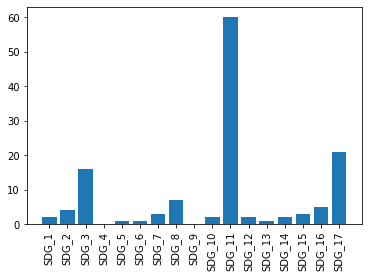

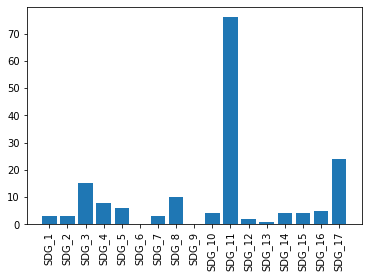

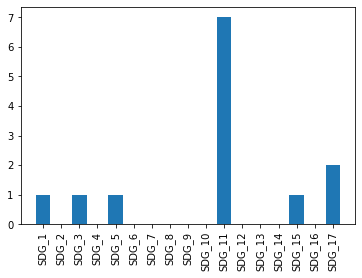

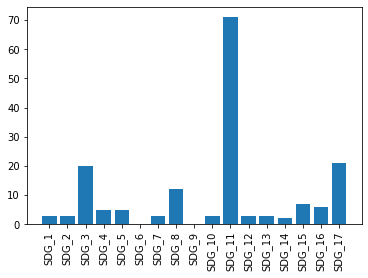

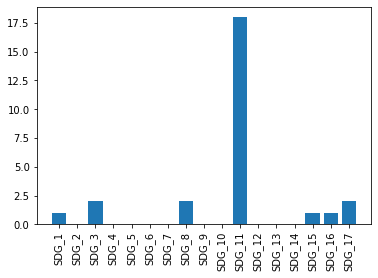

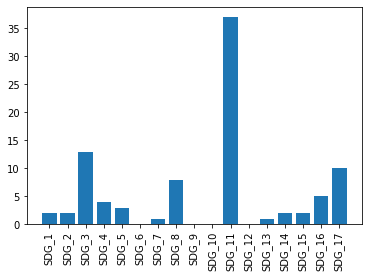

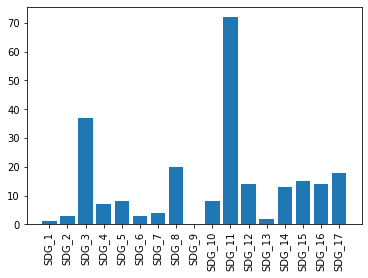

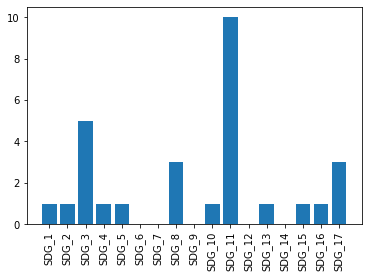

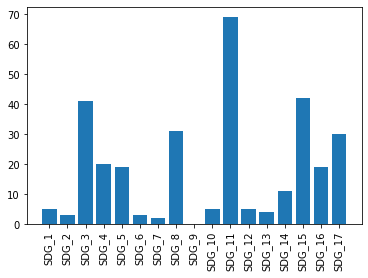

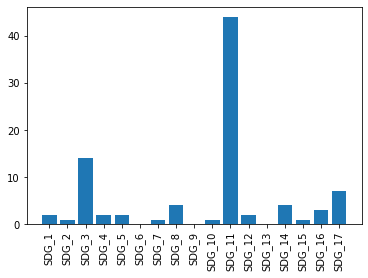

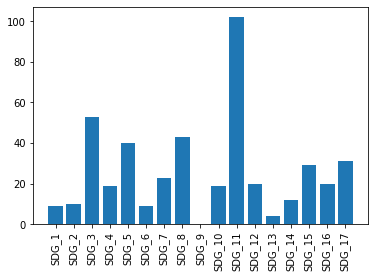

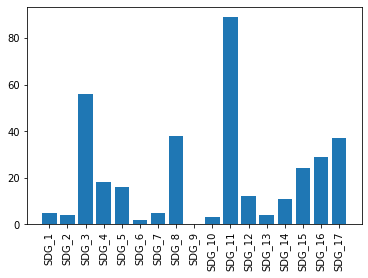

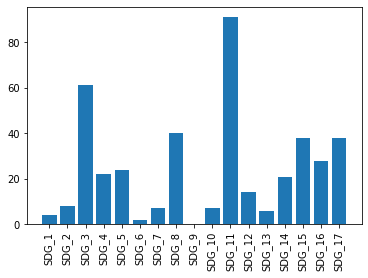

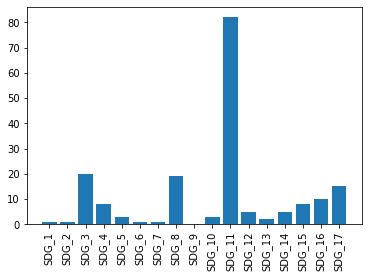

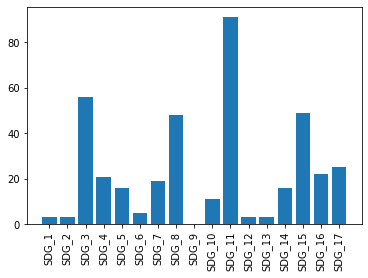

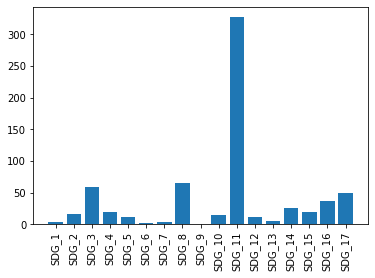

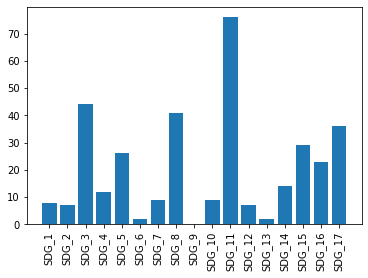

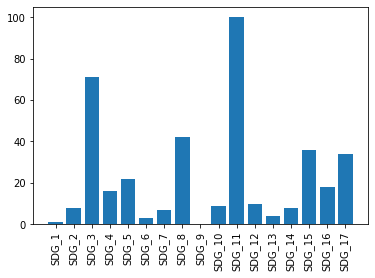

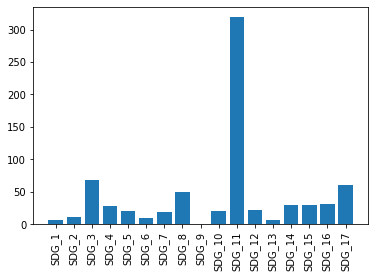

In [428]:
import matplotlib.pyplot as plt
import numpy as np
import ast

D = ast.literal_eval(reports.at[10, 'sdg_count'])
E = ast.literal_eval(reports.at[11, 'sdg_count'])
ind = np.arange(len(D))

for index, row in reports.iterrows():
    sdg_count = ast.literal_eval(row['sdg_count'])  # parse dict from string
    plt.bar(ind, list(sdg_count.values()))
    plt.xticks(ind, list(D.keys()), rotation=90)
    plt.show()
